# 1. Load and Preprocess Dataset

## Data Load

First import the data and check whether there are some missing values:

In [1]:
import pandas as pd
data = pd.read_csv("./gdc_data/last_file_carcinoma.csv", delimiter="\t", index_col=0, low_memory=False)

# data = data.T


In [2]:
data

,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000264510.4,ENSGR0000264819.4,ENSGR0000265658.4,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,tumor_stage
98bb8ea9-025e-40cd-a21e-3a9dd478ef23.tsv,11.885182,0.015710,15.569735,4.178134,1.644657,1.121219,4.161150,26.144210,2.913936,12.138763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,stage_1
d14add36-6662-47ce-9a26-3374bf1e8807.tsv,13.001739,0.479700,25.257213,6.002025,2.287405,2.671804,4.142815,32.463305,5.656340,12.277188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,stage_1
ade61371-c5ef-4a78-b8bd-6ff91082127f.tsv,8.361649,0.021366,29.089279,2.432261,1.618047,3.356805,5.421475,15.494087,4.185319,17.472213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,stage_1
a479e796-26c0-474d-af84-ad603ff421a5.tsv,7.509949,0.326356,34.060615,4.892559,2.358847,1.278727,1.683122,31.308561,4.227487,15.667360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,stage_1
3a223c9c-44fd-4e3e-8515-2209a3c741b6.tsv,2.555800,0.160000,34.606000,5.513400,1.647500,4.683300,11.136600,16.215400,10.119600,11.422100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,stage_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e53d5465-f26e-4599-9469-3ff054457701.tsv,28.682855,0.613078,138.595235,3.256745,3.202896,1.272393,2.079472,31.939466,4.000980,13.194072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,stage_3
264f8954-249e-4b9b-8803-7b81dddc1114.tsv,6.612004,0.071979,47.045586,2.719098,0.771989,2.868790,11.019462,26.647916,5.223965,11.828801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,stage_3
e3cacc94-c92a-42b1-9fad-9db163983729.tsv,14.012250,0.000000,40.343530,3.182987,2.068706,2.400204,0.669107,27.688413,3.499950,11.490357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,stage_3
c7843936-3b14-48b4-8642-8554341d3f21.tsv,24.388335,0.036127,35.961697,4.937238,1.669313,1.012952,2.249482,43.249032,3.223381,17.975347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,stage_3


In [6]:
data.tumor_stage.value_counts()

stage_2    511
stage_3    182
stage_1    146
stage_4     16
Name: tumor_stage, dtype: int64

Deleting stage 4, because, there is very small amount of objects

In [4]:
data1 = data[data.tumor_stage != "stage_4"]

Changing string classification to int variable

In [7]:
y = data1.tumor_stage
X = data1.drop(['tumor_stage'], axis=1)

y.replace({"stage_1": 0}, inplace=True)
y.replace({"stage_2": 1}, inplace=True)
y.replace({"stage_3": 2}, inplace=True)
# y.replace({"stage_4": 3}, inplace=True)

/tmp/ipykernel_307007/3805722954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({"stage_1": 0}, inplace=True)
/tmp/ipykernel_307007/3805722954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({"stage_2": 1}, inplace=True)
/tmp/ipykernel_307007/3805722954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({"stage_3": 2}, inplace=True)


In [17]:
X.isnull().sum().sum()

0

In [18]:
X

,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000263980.4,ENSGR0000264510.4,ENSGR0000264819.4,ENSGR0000265658.4,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1
9c2ffccc-c4c8-4f87-bcd8-8ce099e31b1b.tsv,18.494097,7.602179,19.931779,3.506889,1.271071,0.641102,22.456774,9.238558,4.023385,13.794199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98bb8ea9-025e-40cd-a21e-3a9dd478ef23.tsv,11.885182,0.015710,15.569735,4.178134,1.644657,1.121219,4.161150,26.144210,2.913936,12.138763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80072d64-b734-46ef-b4bf-a9e5cd0d5d06.tsv,30.573980,0.085679,16.685801,5.912154,1.459720,0.941633,4.831594,19.247613,8.056663,12.446309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d14add36-6662-47ce-9a26-3374bf1e8807.tsv,13.001739,0.479700,25.257213,6.002025,2.287405,2.671804,4.142815,32.463305,5.656340,12.277188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728be0eb-7a5b-42cd-84d9-6a86cec842d5.tsv,24.448627,0.854750,35.417509,3.563964,0.780744,2.158713,7.785929,42.377826,7.366566,10.355912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e3cacc94-c92a-42b1-9fad-9db163983729.tsv,14.012250,0.000000,40.343530,3.182987,2.068706,2.400204,0.669107,27.688413,3.499950,11.490357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c7843936-3b14-48b4-8642-8554341d3f21.tsv,24.388335,0.036127,35.961697,4.937238,1.669313,1.012952,2.249482,43.249032,3.223381,17.975347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f6d3d770-157b-479b-a5cc-56e174dda026.tsv,3.298339,0.087305,49.143734,6.470176,3.861269,3.506592,10.045164,13.021841,4.521750,22.206526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
837edc9c-0d20-4889-a9cd-a54ed6b68d13.tsv,4.886429,0.266829,12.872434,0.436898,0.476968,1.386024,17.011954,20.796584,0.877752,3.052971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
print(y.unique())
y

[0 1 2]


98bb8ea9-025e-40cd-a21e-3a9dd478ef23.tsv    0
d14add36-6662-47ce-9a26-3374bf1e8807.tsv    0
ade61371-c5ef-4a78-b8bd-6ff91082127f.tsv    0
a479e796-26c0-474d-af84-ad603ff421a5.tsv    0
3a223c9c-44fd-4e3e-8515-2209a3c741b6.tsv    0
                                           ..
e53d5465-f26e-4599-9469-3ff054457701.tsv    2
264f8954-249e-4b9b-8803-7b81dddc1114.tsv    2
e3cacc94-c92a-42b1-9fad-9db163983729.tsv    2
c7843936-3b14-48b4-8642-8554341d3f21.tsv    2
f6d3d770-157b-479b-a5cc-56e174dda026.tsv    2
Name: tumor_stage, Length: 839, dtype: int64

There appear to be no missing data.

# Features Selection
When it comes to exploring the features of our dataset, we realize that we actually have no idea of what the quantitative variables mean; we have some indications on the general kind of data that were collected, but we are operating in a blind manner.

In this context, we deem more useful to use all the information provided by the available features trying to clean out the noise in the data by means of PCA. Indeed, by selecting a subset of the possible components to both reduce the number of features and the noise, by choosing a lower proportion of the explained variance.

## 1.0.0 Feature selection with PCA

In [14]:
from sklearn.preprocessing import StandardScaler
data_numeric = X

# Create the Scaler object
scaler = StandardScaler()

# Fit your data on the scaler object
data_numeric_standardized = scaler.fit_transform(data_numeric)
data_numeric_standardized=pd.DataFrame(data_numeric_standardized,columns=data_numeric.columns)

from sklearn.decomposition import PCA

pca = PCA(0.90) # 90% of confidency chosen
data_numeric_pca = pca.fit_transform(data_numeric_standardized)


X_pca = pd.DataFrame(data_numeric_pca)
print("After feature selection with PCA, from 60483 features we left %i features"%(X_pca.shape[1]))

After feature selection with PCA, from 60483 features we left 493 features


## Spilitting the data set

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y,random_state=15)

print('Train: ', X_train.shape)
print('Test: ', X_test.shape)

Train:  (629, 493)
Test:  (210, 493)


1    390
2    128
0    111
Name: tumor_stage, dtype: int64
[1, 2, 0]


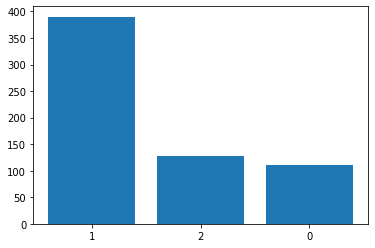

In [16]:
def show_values(y):
  ss = y.value_counts()
  print(ss)
  dd = list(ss.index)
  print(dd)

  import matplotlib.pyplot as plt
  plt.bar(x=[1,2,3], height=ss, tick_label = dd)
  plt.show()
show_values(y_train)


## 1.1.0 Oversampling

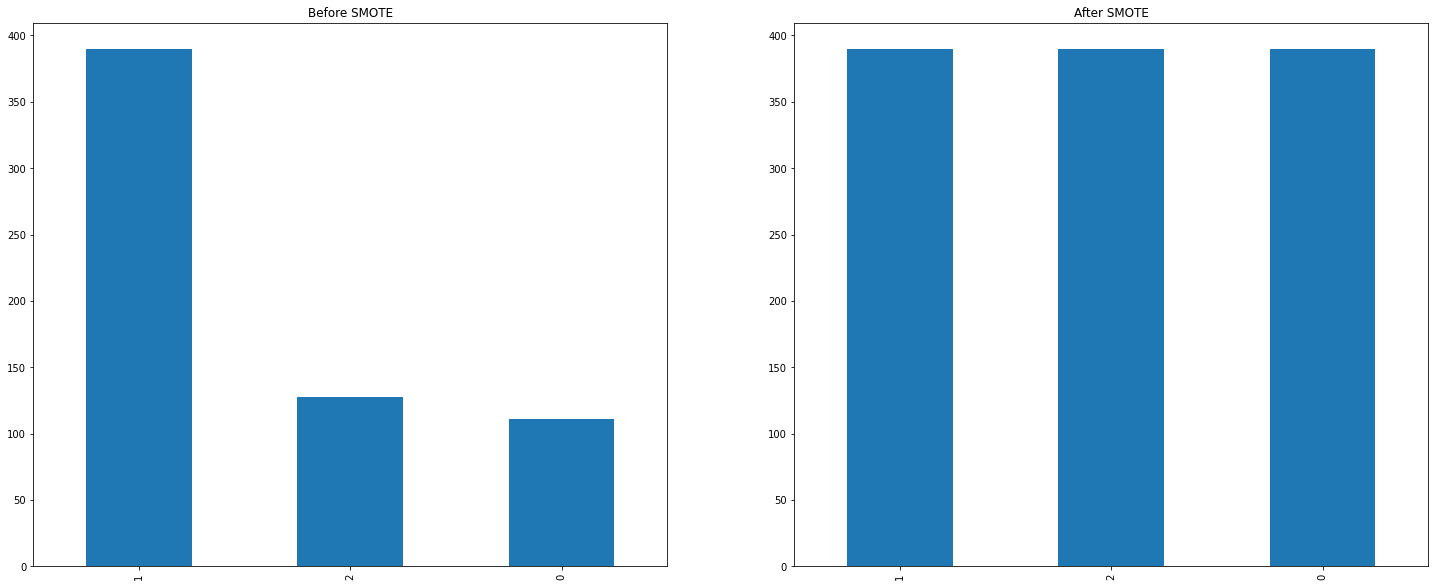

In [17]:
def apply_oversampling(X, y):
  from imblearn.over_sampling import SMOTE
  from matplotlib import pyplot as plt

  X_class = X

  fig, axs = plt.subplots(1,2, figsize=(25,10))
  pd.Series(y_train).value_counts().plot.bar(ax = axs[0]).title.set_text('Before SMOTE')

  smote = SMOTE(random_state = 101)
  X_class, label_cat = smote.fit_resample(X_class, y)

  pd.Series(label_cat).value_counts().plot.bar(ax = axs[1]).title.set_text('After SMOTE')

  return X_class, label_cat

X_train_1, y_train_1 = apply_oversampling(X_train, y_train)

# Data Clasification

## 1.1.1. NN

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer


param_grid = {'activation': ['logistic', 'relu'],'alpha':[0.0001,0.001]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

neu_net = MLPClassifier(random_state=1, max_iter=300)
clf_nn = GridSearchCV(neu_net, param_grid,cv=10,scoring=scores,
                       refit='accuracy', return_train_score=True,n_jobs=5)
clf_nn.fit(X_train_1, y_train_1)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=300, random_state=1),
             n_jobs=5,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.0001, 0.001]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)})

In [19]:
print(clf_nn.best_params_)

{'activation': 'logistic', 'alpha': 0.0001}


In [20]:
df = pd.DataFrame(clf_nn.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,3.528071,"{'activation': 'logistic', 'alpha': 0.0001}",0.790598,0.034027,1,0.790598,0.034027,0.790598,0.034027
1,3.436129,"{'activation': 'logistic', 'alpha': 0.001}",0.789744,0.034655,2,0.789744,0.034655,0.789744,0.034655
2,1.890599,"{'activation': 'relu', 'alpha': 0.0001}",0.782906,0.057105,3,0.782906,0.057105,0.782906,0.057105
3,1.852266,"{'activation': 'relu', 'alpha': 0.001}",0.782906,0.057105,3,0.782906,0.057105,0.782906,0.057105


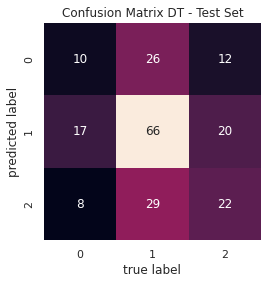

Precision: 0.467
Recall: 0.467
Accuracy: 0.467


In [21]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_test_pred = clf_nn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 1.1.2. Tree model

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer


tree_para = {'criterion':['gini','entropy'],'max_depth':[4,6,8,10,12,15,17,20]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

clf_tree = GridSearchCV(DecisionTreeClassifier(random_state=15), tree_para, cv=10,
                        scoring=scores,refit='accuracy', return_train_score=True,n_jobs=4)
clf_tree = clf_tree.fit(X_train_1, y_train_1)
print(clf_tree.best_params_)

{'criterion': 'gini', 'max_depth': 15}


In [23]:
df = pd.DataFrame(clf_tree.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
5,0.298240,"{'criterion': 'gini', 'max_depth': 15}",0.687179,0.053540,1,0.687179,0.053540,0.687179,0.053540
4,0.286052,"{'criterion': 'gini', 'max_depth': 12}",0.684615,0.063897,2,0.684615,0.063897,0.684615,0.063897
6,0.279904,"{'criterion': 'gini', 'max_depth': 17}",0.684615,0.053026,2,0.684615,0.053026,0.684615,0.053026
7,0.280182,"{'criterion': 'gini', 'max_depth': 20}",0.684615,0.053026,2,0.684615,0.053026,0.684615,0.053026
3,0.269202,"{'criterion': 'gini', 'max_depth': 10}",0.679487,0.060346,5,0.679487,0.060346,0.679487,0.060346
12,0.367149,"{'criterion': 'entropy', 'max_depth': 12}",0.675214,0.093002,6,0.675214,0.093002,0.675214,0.093002
13,0.369912,"{'criterion': 'entropy', 'max_depth': 15}",0.675214,0.093002,6,0.675214,0.093002,0.675214,0.093002
14,0.371898,"{'criterion': 'entropy', 'max_depth': 17}",0.675214,0.093002,6,0.675214,0.093002,0.675214,0.093002
15,0.370530,"{'criterion': 'entropy', 'max_depth': 20}",0.675214,0.093002,6,0.675214,0.093002,0.675214,0.093002
2,0.245003,"{'criterion': 'gini', 'max_depth': 8}",0.673504,0.051821,10,0.673504,0.051821,0.673504,0.051821


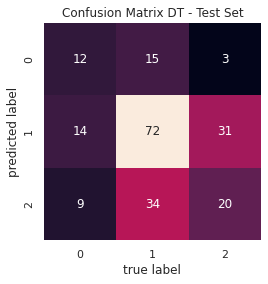

Precision: 0.495
Recall: 0.495
Accuracy: 0.495


In [24]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_test_pred = clf_tree.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 1.1.3. K Neighbours

In [25]:
from sklearn.neighbors import KNeighborsClassifier

nn_para = {'n_neighbors':[3,6,9],
          'metric':["euclidean","manhattan"]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

clf_kn = GridSearchCV(KNeighborsClassifier(), nn_para, cv=10, scoring=scores,
                       refit='accuracy', return_train_score=True,n_jobs=4)
clf_kn = clf_kn.fit(X_train_1, y_train_1)
print(clf_kn.best_params_)

{'metric': 'euclidean', 'n_neighbors': 3}


In [26]:
df = pd.DataFrame(clf_kn.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,0.009516,"{'metric': 'euclidean', 'n_neighbors': 3}",0.659829,0.043548,1,0.659829,0.043548,0.659829,0.043548
3,0.005525,"{'metric': 'manhattan', 'n_neighbors': 3}",0.640171,0.039806,2,0.640171,0.039806,0.640171,0.039806
1,0.007202,"{'metric': 'euclidean', 'n_neighbors': 6}",0.622222,0.051821,3,0.622222,0.051821,0.622222,0.051821
4,0.004659,"{'metric': 'manhattan', 'n_neighbors': 6}",0.600000,0.053212,4,0.600000,0.053212,0.600000,0.053212
2,0.007740,"{'metric': 'euclidean', 'n_neighbors': 9}",0.591453,0.045032,5,0.591453,0.045032,0.591453,0.045032
5,0.004512,"{'metric': 'manhattan', 'n_neighbors': 9}",0.569231,0.060942,6,0.569231,0.060942,0.569231,0.060942


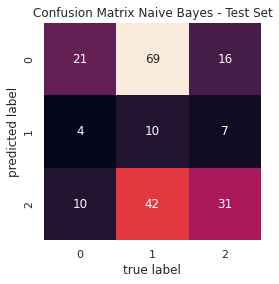

Precision: 0.495
Recall: 0.495
Accuracy: 0.495


In [27]:
y_test_pred_gnb = clf_kn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred_gnb)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_gnb))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix Naive Bayes - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 1.1.4. Support Vector Machine

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

param_grid =  {'penalty':['l2'],'C':[1,2,3,5,10,15,20,30,40,60,90, 320]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

svc = svm.LinearSVC(random_state=10)
clf_svc = GridSearchCV(svc, param_grid,cv=10,scoring=scores,
                        refit='accuracy', return_train_score=True, n_jobs=5)
clf_svc.fit(X_train_1, y_train_1) 

/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=10, estimator=LinearSVC(random_state=10), n_jobs=5,
             param_grid={'C': [1, 2, 3, 5, 10, 15, 20, 30, 40, 60, 90, 320],
                         'penalty': ['l2']},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)})

In [61]:
print(clf_svc.best_params_)

{'C': 40, 'penalty': 'l2'}


In [62]:
df = pd.DataFrame(clf_svc.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
8,2.901229,"{'C': 40, 'penalty': 'l2'}",0.763796,0.038931,1,0.763796,0.038931,0.763796,0.038931
10,2.928316,"{'C': 90, 'penalty': 'l2'}",0.763796,0.038931,1,0.763796,0.038931,0.763796,0.038931
11,2.860734,"{'C': 320, 'penalty': 'l2'}",0.763155,0.038995,3,0.763155,0.038995,0.763155,0.038995
7,2.891411,"{'C': 30, 'penalty': 'l2'}",0.762522,0.038893,4,0.762522,0.038893,0.762522,0.038893
9,2.906292,"{'C': 60, 'penalty': 'l2'}",0.762522,0.038893,4,0.762522,0.038893,0.762522,0.038893
3,3.218919,"{'C': 5, 'penalty': 'l2'}",0.761886,0.036210,6,0.761886,0.036210,0.761886,0.036210
0,2.850700,"{'C': 1, 'penalty': 'l2'}",0.761881,0.040569,7,0.761881,0.040569,0.761881,0.040569
1,2.823375,"{'C': 2, 'penalty': 'l2'}",0.761881,0.039235,7,0.761881,0.039235,0.761881,0.039235
2,3.027655,"{'C': 3, 'penalty': 'l2'}",0.761244,0.037564,9,0.761244,0.037564,0.761244,0.037564
5,3.108260,"{'C': 15, 'penalty': 'l2'}",0.760608,0.036898,10,0.760608,0.036898,0.760608,0.036898


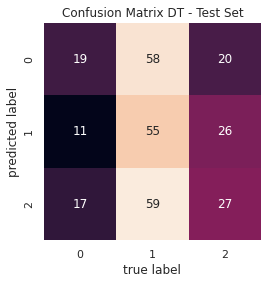

Precision: 0.346
Recall: 0.346
Accuracy: 0.346


In [115]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = clf_svc.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

# Ensemble method:


## 1.1.5. Voting clasifier

In [28]:
from sklearn.ensemble import VotingClassifier

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


classif_model_1 = DecisionTreeClassifier(random_state=15, criterion= 'gini', max_depth= 10)

classif_model_2 = MLPClassifier(random_state=1, max_iter=300, activation= 'relu', alpha= 0.0001)

classif_model_3 = svm.LinearSVC(random_state=1, C= 1, penalty= 'l2')

classif_model_4 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, 
                                       weights= 'distance',n_jobs=4)

ereg = VotingClassifier(estimators=[('DT', classif_model_1), ('NN', classif_model_2),
                                    ('SVC', classif_model_3), ('KNN', classif_model_4)])
ereg = ereg.fit(X_train_1, y_train_1)

/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
from sklearn.metrics import classification_report

y_pred_rf = ereg .predict(X_test)

print('Classification report:\n{0}\n'.format(classification_report(y_test, y_pred_rf)))

Classification report:
              precision    recall  f1-score   support

           0       0.21      0.54      0.30        35
           1       0.58      0.36      0.44       121
           2       0.36      0.30      0.33        54

    accuracy                           0.37       210
   macro avg       0.38      0.40      0.36       210
weighted avg       0.46      0.37      0.39       210




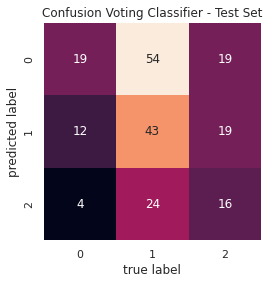

In [30]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = ereg.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Voting Classifier - Test Set')
plt.show()

## 1.1.6. XGBoost

In [82]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=10)
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=10, cv=3, n_jobs=8, return_train_score=True)

search.fit(X_train_1, y_train_1)

/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/

[13:37:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[13:37:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:59:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[14:16:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fab90cd13d0>,
                                        'max_depth':

In [83]:
search.best_params_

{'colsample_bytree': 0.9313961929800237,
 'gamma': 0.01037597467970075,
 'learning_rate': 0.2200944704778826,
 'max_depth': 5,
 'n_estimators': 128,
 'subsample': 0.7994028049210362}

In [84]:
from sklearn.metrics import classification_report

y_pred_rf = search.predict(X_test)

print('Classification report:\n{0}\n'.format(classification_report(y_test, y_pred_rf)))

Classification report:
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        47
           1       0.60      0.80      0.68       172
           2       0.28      0.14      0.18        73

    accuracy                           0.53       292
   macro avg       0.40      0.37      0.37       292
weighted avg       0.48      0.53      0.49       292




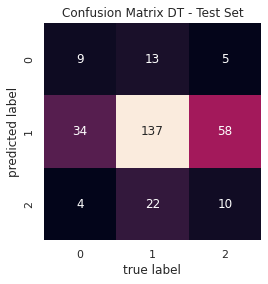

In [85]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = search.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

## 1.2.0. Undersampling

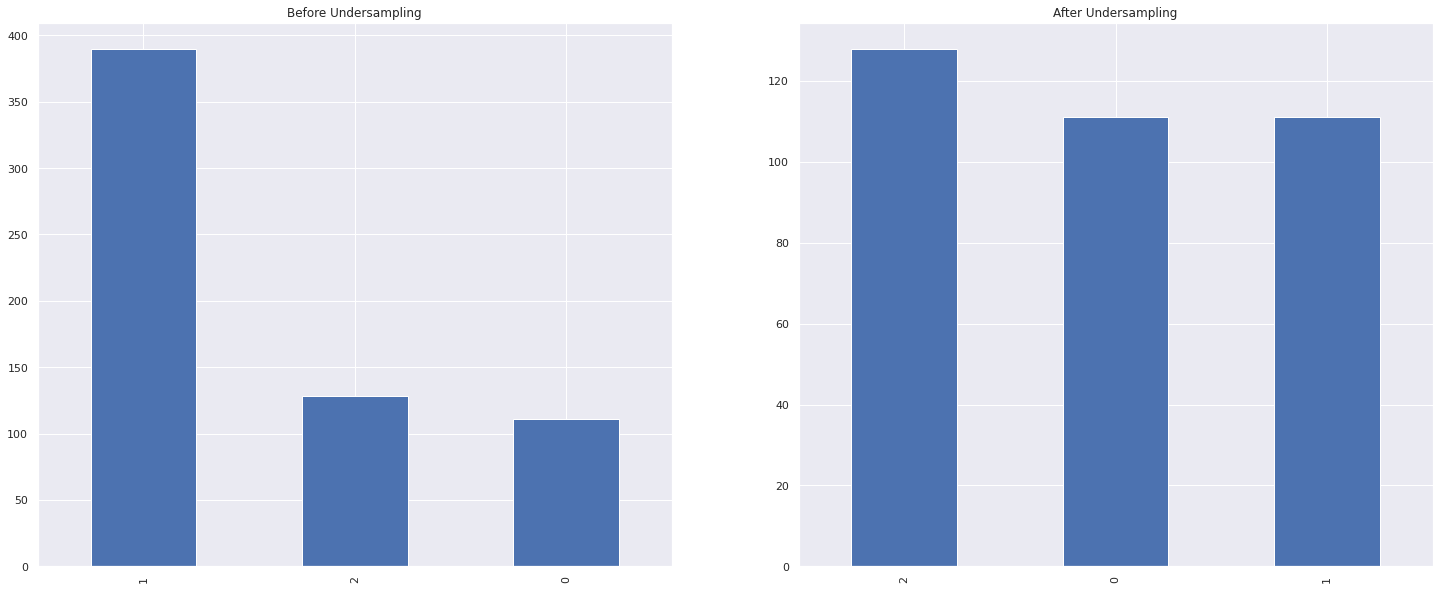

In [31]:
def apply_undersampling(X, y):
    from imblearn.under_sampling import RandomUnderSampler
    from matplotlib import pyplot as plt

    X_class = X

    fig, axs = plt.subplots(1,2, figsize=(25,10))
    pd.Series(y_train).value_counts().plot.bar(ax = axs[0]).title.set_text('Before Undersampling')

    undersample = RandomUnderSampler(sampling_strategy='majority')
    # undersample = RandomUnderSampler(sampling_strategy=0.5)
    # fit and apply the transform

    X_class, label_cat = undersample.fit_resample(X, y)

    pd.Series(label_cat).value_counts().plot.bar(ax = axs[1]).title.set_text('After Undersampling')

    return X_class, label_cat

X_train_1, y_train_1 = apply_undersampling(X_train, y_train)

In [32]:
X_train_1.shape
# X_class, label_cat

(350, 493)

# Data Clasification

## 1.2.1. NN

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer


param_grid = {'activation': ['logistic', 'relu'],'alpha':[0.0001,0.001]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

neu_net = MLPClassifier(random_state=1, max_iter=300)
clf_nn = GridSearchCV(neu_net, param_grid,cv=10,scoring=scores,
                       refit='accuracy', return_train_score=True,n_jobs=5)
clf_nn.fit(X_train_1, y_train_1)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=300, random_state=1),
             n_jobs=5,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.0001, 0.001]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)})

In [34]:
print(clf_nn.best_params_)

{'activation': 'logistic', 'alpha': 0.001}


In [35]:
df = pd.DataFrame(clf_nn.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
1,1.597013,"{'activation': 'logistic', 'alpha': 0.001}",0.348571,0.101257,1,0.348571,0.101257,0.348571,0.101257
0,1.566147,"{'activation': 'logistic', 'alpha': 0.0001}",0.345714,0.097688,2,0.345714,0.097688,0.345714,0.097688
2,0.489710,"{'activation': 'relu', 'alpha': 0.0001}",0.320000,0.092846,3,0.320000,0.092846,0.320000,0.092846
3,0.449750,"{'activation': 'relu', 'alpha': 0.001}",0.320000,0.092846,3,0.320000,0.092846,0.320000,0.092846


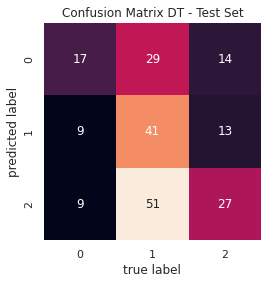

Precision: 0.405
Recall: 0.405
Accuracy: 0.405


In [36]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_test_pred = clf_nn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 1.2.2. Tree model

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer


tree_para = {'criterion':['gini','entropy'],'max_depth':[4,6,8,10,12,15,17,20]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

clf_tree = GridSearchCV(DecisionTreeClassifier(random_state=15), tree_para, cv=10,
                        scoring=scores,refit='accuracy', return_train_score=True,n_jobs=4)
clf_tree = clf_tree.fit(X_train_1, y_train_1)
print(clf_tree.best_params_)

{'criterion': 'gini', 'max_depth': 12}


In [38]:
df = pd.DataFrame(clf_tree.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
4,0.070709,"{'criterion': 'gini', 'max_depth': 12}",0.357143,0.051508,1,0.357143,0.051508,0.357143,0.051508
5,0.070843,"{'criterion': 'gini', 'max_depth': 15}",0.357143,0.054586,1,0.357143,0.054586,0.357143,0.054586
6,0.074771,"{'criterion': 'gini', 'max_depth': 17}",0.357143,0.054586,1,0.357143,0.054586,0.357143,0.054586
7,0.072162,"{'criterion': 'gini', 'max_depth': 20}",0.357143,0.054586,1,0.357143,0.054586,0.357143,0.054586
12,0.113626,"{'criterion': 'entropy', 'max_depth': 12}",0.351429,0.062662,5,0.351429,0.062662,0.351429,0.062662
3,0.068461,"{'criterion': 'gini', 'max_depth': 10}",0.345714,0.034876,6,0.345714,0.034876,0.345714,0.034876
0,0.040314,"{'criterion': 'gini', 'max_depth': 4}",0.345714,0.078194,7,0.345714,0.078194,0.345714,0.078194
11,0.106803,"{'criterion': 'entropy', 'max_depth': 10}",0.342857,0.057143,8,0.342857,0.057143,0.342857,0.057143
14,0.101584,"{'criterion': 'entropy', 'max_depth': 17}",0.342857,0.054210,8,0.342857,0.054210,0.342857,0.054210
15,0.101026,"{'criterion': 'entropy', 'max_depth': 20}",0.342857,0.054210,8,0.342857,0.054210,0.342857,0.054210


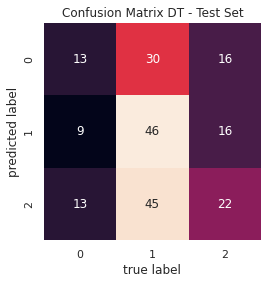

Precision: 0.386
Recall: 0.386
Accuracy: 0.386


In [39]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_test_pred = clf_tree.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 1.2.3. K Neighbours

In [98]:
from sklearn.neighbors import KNeighborsClassifier

nn_para = {'n_neighbors':[3,6,9],
          'metric':["euclidean","manhattan"]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

clf_kn = GridSearchCV(KNeighborsClassifier(), nn_para, cv=10, scoring=scores,
                       refit='accuracy', return_train_score=True,n_jobs=4)
clf_kn = clf_kn.fit(X_train_1, y_train_1)
print(clf_kn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 6}


In [99]:
df = pd.DataFrame(clf_kn.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
4,0.004169,"{'metric': 'manhattan', 'n_neighbors': 6}",0.402449,0.067323,1,0.402449,0.067323,0.402449,0.067323
1,0.006124,"{'metric': 'euclidean', 'n_neighbors': 6}",0.400490,0.052950,2,0.400490,0.052950,0.400490,0.052950
2,0.005360,"{'metric': 'euclidean', 'n_neighbors': 9}",0.396490,0.035671,3,0.396490,0.035671,0.396490,0.035671
3,0.004845,"{'metric': 'manhattan', 'n_neighbors': 3}",0.392286,0.052245,4,0.392286,0.052245,0.392286,0.052245
5,0.003482,"{'metric': 'manhattan', 'n_neighbors': 9}",0.392041,0.079734,5,0.392041,0.079734,0.392041,0.079734
0,0.008561,"{'metric': 'euclidean', 'n_neighbors': 3}",0.368041,0.066313,6,0.368041,0.066313,0.368041,0.066313


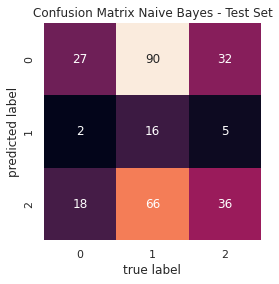

Precision: 0.353
Recall: 0.353
Accuracy: 0.353


In [100]:
y_test_pred_gnb = clf_kn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred_gnb)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_gnb))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix Naive Bayes - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 1.2.4. Support Vector Machine

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

param_grid =  {'penalty':['l2'],'C':[1,2,3,5,10,15,20,30,40,60,90, 320]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

svc = svm.LinearSVC(random_state=10)
clf_svc = GridSearchCV(svc, param_grid,cv=10,scoring=scores,
                        refit='accuracy', return_train_score=True, n_jobs=5)
clf_svc.fit(X_train_1, y_train_1) 

/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=10, estimator=LinearSVC(random_state=10), n_jobs=5,
             param_grid={'C': [1, 2, 3, 5, 10, 15, 20, 30, 40, 60, 90, 320],
                         'penalty': ['l2']},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)})

In [102]:
print(clf_svc.best_params_)

{'C': 1, 'penalty': 'l2'}


In [103]:
df = pd.DataFrame(clf_svc.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,0.632853,"{'C': 1, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407
1,0.625302,"{'C': 2, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407
2,0.622350,"{'C': 3, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407
3,0.615169,"{'C': 5, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407
4,0.616377,"{'C': 10, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407
5,0.634758,"{'C': 15, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407
6,0.616007,"{'C': 20, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407
7,0.630895,"{'C': 30, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407
8,0.624804,"{'C': 40, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407
9,0.608447,"{'C': 60, 'penalty': 'l2'}",0.396245,0.048407,1,0.396245,0.048407,0.396245,0.048407


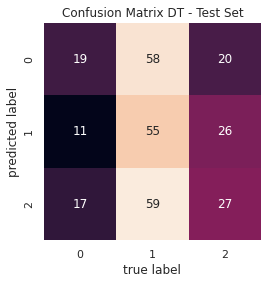

Precision: 0.346
Recall: 0.346
Accuracy: 0.346


In [104]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = clf_svc.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

# Ensemble method:


## 1.2.5. Voting clasifier

In [120]:
from sklearn.ensemble import VotingClassifier

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


classif_model_1 = DecisionTreeClassifier(random_state=15, criterion= 'gini', max_depth= 10)

classif_model_2 = MLPClassifier(random_state=1, max_iter=300, activation= 'relu', alpha= 0.0001)

classif_model_3 = svm.LinearSVC(random_state=1, C= 1, penalty= 'l2')

classif_model_4 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, 
                                       weights= 'distance',n_jobs=4)

ereg = VotingClassifier(estimators=[('DT', classif_model_1), ('NN', classif_model_2),
                                    ('SVC', classif_model_3), ('KNN', classif_model_4)])
ereg = ereg.fit(X_train_1, y_train_1)

/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [121]:
from sklearn.metrics import classification_report

y_pred_rf = ereg .predict(X_test)

print('Classification report:\n{0}\n'.format(classification_report(y_test, y_pred_rf)))

Classification report:
              precision    recall  f1-score   support

           0       0.20      0.51      0.28        47
           1       0.57      0.21      0.31       172
           2       0.30      0.44      0.36        73

    accuracy                           0.32       292
   macro avg       0.36      0.39      0.32       292
weighted avg       0.44      0.32      0.32       292




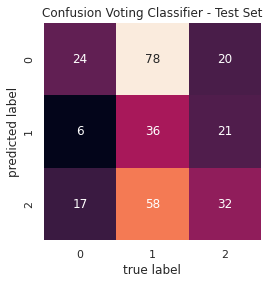

In [122]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = ereg.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Voting Classifier - Test Set')
plt.show()

## 1.2.6. XGBoost

In [123]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=10)
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=10, cv=3, n_jobs=8, return_train_score=True)

search.fit(X_train_1, y_train_1)

/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faaf38b57c0>,
                                        'max_depth':

In [124]:
search.best_params_

{'colsample_bytree': 0.7674389936592543,
 'gamma': 0.09903143237981199,
 'learning_rate': 0.25815921365968764,
 'max_depth': 2,
 'n_estimators': 142,
 'subsample': 0.6353359256696041}

In [125]:
from sklearn.metrics import classification_report

y_pred_rf = search.predict(X_test)

print('Classification report:\n{0}\n'.format(classification_report(y_test, y_pred_rf)))

Classification report:
              precision    recall  f1-score   support

           0       0.24      0.36      0.29        47
           1       0.61      0.23      0.34       172
           2       0.27      0.56      0.36        73

    accuracy                           0.34       292
   macro avg       0.37      0.39      0.33       292
weighted avg       0.46      0.34      0.33       292




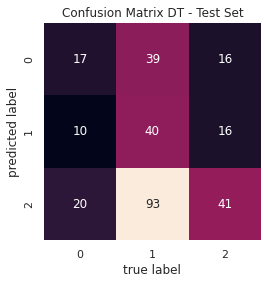

[14:29:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[14:29:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[14:29:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[14:29:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[14:29:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:40:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:52:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[14:29:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:41:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[14:29:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

In [126]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = search.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

## 2.0.0 Features Selection by variance

In [40]:
def select_f_by_variance(X, threshold):
    from sklearn.feature_selection import VarianceThreshold
    selector = VarianceThreshold(threshold)
    selector.fit(X)
    X.columns[selector.get_support()]

    X_n = X[X.columns[selector.get_support()]]
    return X_n
X_var = select_f_by_variance(X, 500)

print("After feature selection by variance, from 60483 features we left %i features"%(X_var.shape[1]))

After feature selection by variance, from 60483 features we left 1618 features


## Spilitting the data set

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y,random_state=15)

print('Train: ', X_train.shape)
print('Test: ', X_test.shape)

Train:  (629, 493)
Test:  (210, 493)


1    390
2    128
0    111
Name: tumor_stage, dtype: int64
[1, 2, 0]


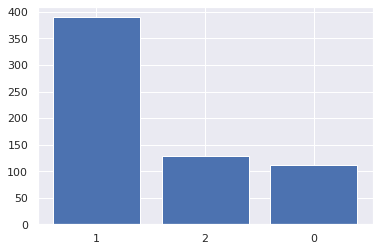

In [42]:
def show_values(y):
  ss = y.value_counts()
  print(ss)
  dd = list(ss.index)
  print(dd)

  import matplotlib.pyplot as plt
  plt.bar(x=[1,2,3], height=ss, tick_label = dd)
  plt.show()
show_values(y_train)


## 1.1.0 Oversampling

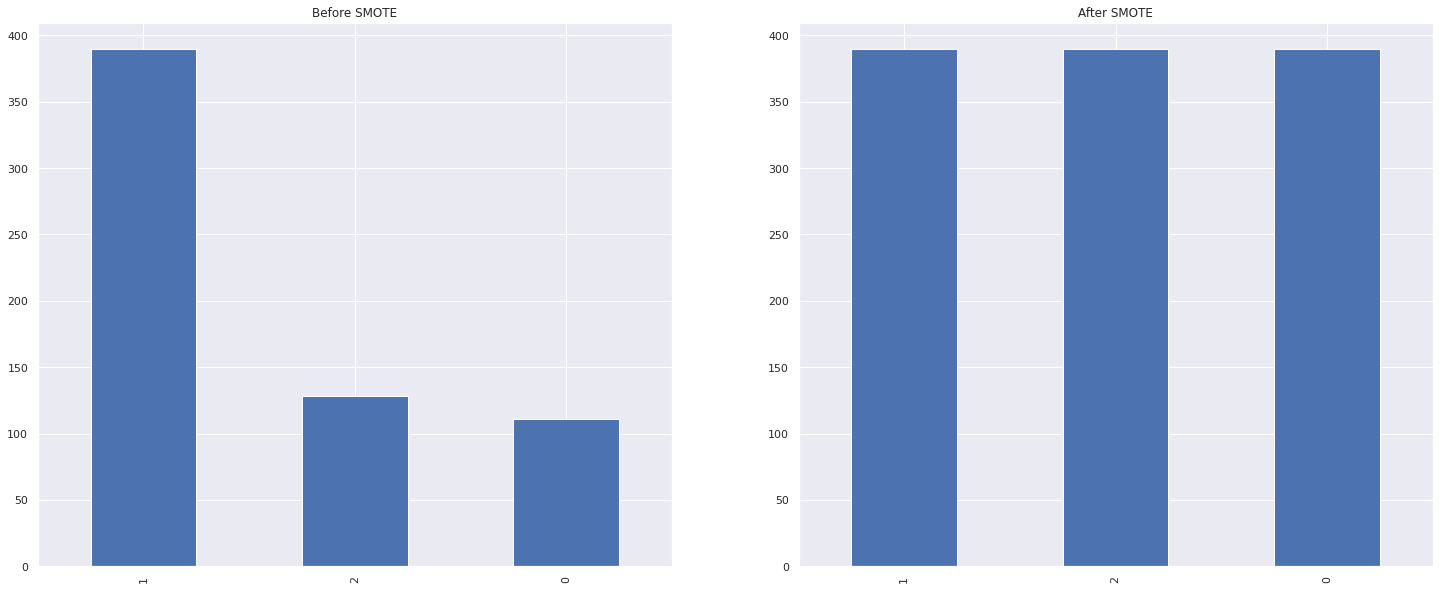

In [43]:
def apply_oversampling(X, y):
  from imblearn.over_sampling import SMOTE
  from matplotlib import pyplot as plt

  X_class = X

  fig, axs = plt.subplots(1,2, figsize=(25,10))
  pd.Series(y_train).value_counts().plot.bar(ax = axs[0]).title.set_text('Before SMOTE')

  smote = SMOTE(random_state = 101)
  X_class, label_cat = smote.fit_resample(X_class, y)

  pd.Series(label_cat).value_counts().plot.bar(ax = axs[1]).title.set_text('After SMOTE')

  return X_class, label_cat

X_train_1, y_train_1 = apply_oversampling(X_train, y_train)

# Data Clasification

## 2.1.1. NN

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer


param_grid = {'activation': ['logistic', 'relu'],'alpha':[0.0001,0.001]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

neu_net = MLPClassifier(random_state=1, max_iter=300)
clf_nn = GridSearchCV(neu_net, param_grid,cv=10,scoring=scores,
                       refit='accuracy', return_train_score=True,n_jobs=5)
clf_nn.fit(X_train_1, y_train_1)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=300, random_state=1),
             n_jobs=5,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.0001, 0.001]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)})

In [45]:
print(clf_nn.best_params_)

{'activation': 'logistic', 'alpha': 0.0001}


In [46]:
df = pd.DataFrame(clf_nn.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,3.426619,"{'activation': 'logistic', 'alpha': 0.0001}",0.790598,0.034027,1,0.790598,0.034027,0.790598,0.034027
1,3.533661,"{'activation': 'logistic', 'alpha': 0.001}",0.789744,0.034655,2,0.789744,0.034655,0.789744,0.034655
2,1.848320,"{'activation': 'relu', 'alpha': 0.0001}",0.782906,0.057105,3,0.782906,0.057105,0.782906,0.057105
3,1.837143,"{'activation': 'relu', 'alpha': 0.001}",0.782906,0.057105,3,0.782906,0.057105,0.782906,0.057105


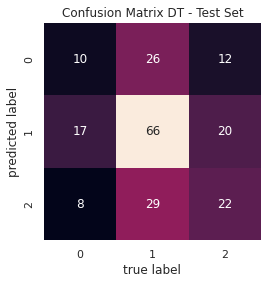

Precision: 0.467
Recall: 0.467
Accuracy: 0.467


In [47]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_test_pred = clf_nn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 2.1.2. Tree model

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer


tree_para = {'criterion':['gini','entropy'],'max_depth':[4,6,8,10,12,15,17,20]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

clf_tree = GridSearchCV(DecisionTreeClassifier(random_state=15), tree_para, cv=10,
                        scoring=scores,refit='accuracy', return_train_score=True,n_jobs=4)
clf_tree = clf_tree.fit(X_train_1, y_train_1)
print(clf_tree.best_params_)

{'criterion': 'entropy', 'max_depth': 15}


In [136]:
df = pd.DataFrame(clf_tree.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
13,0.797402,"{'criterion': 'entropy', 'max_depth': 15}",0.655279,0.067756,1,0.655279,0.067756,0.655279,0.067756
14,0.796825,"{'criterion': 'entropy', 'max_depth': 17}",0.650821,0.066743,2,0.650821,0.066743,0.650821,0.066743
15,0.792621,"{'criterion': 'entropy', 'max_depth': 20}",0.650821,0.066743,2,0.650821,0.066743,0.650821,0.066743
12,0.790133,"{'criterion': 'entropy', 'max_depth': 12}",0.648273,0.072226,4,0.648273,0.072226,0.648273,0.072226
6,0.645684,"{'criterion': 'gini', 'max_depth': 17}",0.647607,0.081889,5,0.647607,0.081889,0.647607,0.081889
7,0.660708,"{'criterion': 'gini', 'max_depth': 20}",0.644406,0.078597,6,0.644406,0.078597,0.644406,0.078597
11,0.765384,"{'criterion': 'entropy', 'max_depth': 10}",0.640577,0.052175,7,0.640577,0.052175,0.640577,0.052175
5,0.632723,"{'criterion': 'gini', 'max_depth': 15}",0.637404,0.074361,8,0.637404,0.074361,0.637404,0.074361
4,0.591465,"{'criterion': 'gini', 'max_depth': 12}",0.636142,0.076938,9,0.636142,0.076938,0.636142,0.076938
3,0.569947,"{'criterion': 'gini', 'max_depth': 10}",0.625931,0.069287,10,0.625931,0.069287,0.625931,0.069287


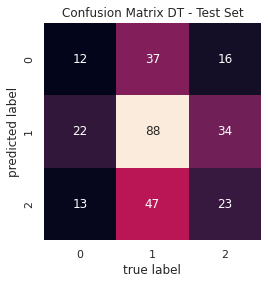

Precision: 0.421
Recall: 0.421
Accuracy: 0.421


In [137]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_test_pred = clf_tree.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 2.1.3. K Neighbours

In [139]:
from sklearn.neighbors import KNeighborsClassifier

nn_para = {'n_neighbors':[3,6,9],
          'metric':["euclidean","manhattan"]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

clf_kn = GridSearchCV(KNeighborsClassifier(), nn_para, cv=10, scoring=scores,
                       refit='accuracy', return_train_score=True,n_jobs=4)
clf_kn = clf_kn.fit(X_train_1, y_train_1)
print(clf_kn.best_params_)

{'metric': 'euclidean', 'n_neighbors': 3}


In [140]:
df = pd.DataFrame(clf_kn.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,0.010657,"{'metric': 'euclidean', 'n_neighbors': 3}",0.641863,0.047876,1,0.641863,0.047876,0.641863,0.047876
3,0.006493,"{'metric': 'manhattan', 'n_neighbors': 3}",0.634179,0.041421,2,0.634179,0.041421,0.634179,0.041421
4,0.005544,"{'metric': 'manhattan', 'n_neighbors': 6}",0.595264,0.056955,3,0.595264,0.056955,0.595264,0.056955
1,0.007732,"{'metric': 'euclidean', 'n_neighbors': 6}",0.592700,0.052373,4,0.592700,0.052373,0.592700,0.052373
5,0.005730,"{'metric': 'manhattan', 'n_neighbors': 9}",0.575478,0.066601,5,0.575478,0.066601,0.575478,0.066601
2,0.008512,"{'metric': 'euclidean', 'n_neighbors': 9}",0.571619,0.053811,6,0.571619,0.053811,0.571619,0.053811


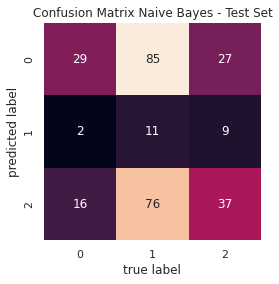

Precision: 0.421
Recall: 0.421
Accuracy: 0.421


In [141]:
y_test_pred_gnb = clf_kn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred_gnb)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_gnb))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix Naive Bayes - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 2.1.4. Support Vector Machine

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

param_grid =  {'penalty':['l2'],'C':[1,2,3,5,10,15,20,30,40,60,90, 320]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

svc = svm.LinearSVC(random_state=10)
clf_svc = GridSearchCV(svc, param_grid,cv=10,scoring=scores,
                        refit='accuracy', return_train_score=True, n_jobs=5)
clf_svc.fit(X_train_1, y_train_1) 

/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=10, estimator=LinearSVC(random_state=10), n_jobs=5,
             param_grid={'C': [1, 2, 3, 5, 10, 15, 20, 30, 40, 60, 90, 320],
                         'penalty': ['l2']},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)})

In [143]:
print(clf_svc.best_params_)

{'C': 40, 'penalty': 'l2'}


In [144]:
df = pd.DataFrame(clf_svc.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
8,3.037798,"{'C': 40, 'penalty': 'l2'}",0.763796,0.038931,1,0.763796,0.038931,0.763796,0.038931
10,3.234322,"{'C': 90, 'penalty': 'l2'}",0.763796,0.038931,1,0.763796,0.038931,0.763796,0.038931
11,2.946505,"{'C': 320, 'penalty': 'l2'}",0.763155,0.038995,3,0.763155,0.038995,0.763155,0.038995
7,3.009488,"{'C': 30, 'penalty': 'l2'}",0.762522,0.038893,4,0.762522,0.038893,0.762522,0.038893
9,3.258892,"{'C': 60, 'penalty': 'l2'}",0.762522,0.038893,4,0.762522,0.038893,0.762522,0.038893
3,3.111251,"{'C': 5, 'penalty': 'l2'}",0.761886,0.036210,6,0.761886,0.036210,0.761886,0.036210
0,2.934155,"{'C': 1, 'penalty': 'l2'}",0.761881,0.040569,7,0.761881,0.040569,0.761881,0.040569
1,2.913789,"{'C': 2, 'penalty': 'l2'}",0.761881,0.039235,7,0.761881,0.039235,0.761881,0.039235
2,2.963850,"{'C': 3, 'penalty': 'l2'}",0.761244,0.037564,9,0.761244,0.037564,0.761244,0.037564
5,3.224439,"{'C': 15, 'penalty': 'l2'}",0.760608,0.036898,10,0.760608,0.036898,0.760608,0.036898


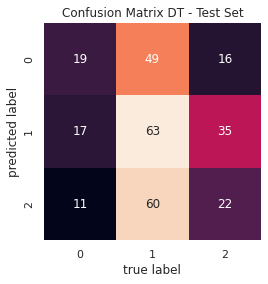

Precision: 0.356
Recall: 0.356
Accuracy: 0.356


In [145]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = clf_svc.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

# Ensemble method:


## 2.1.5. Voting clasifier

In [146]:
from sklearn.ensemble import VotingClassifier

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


classif_model_1 = DecisionTreeClassifier(random_state=15, criterion= 'gini', max_depth= 10)

classif_model_2 = MLPClassifier(random_state=1, max_iter=300, activation= 'relu', alpha= 0.0001)

classif_model_3 = svm.LinearSVC(random_state=1, C= 1, penalty= 'l2')

classif_model_4 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, 
                                       weights= 'distance',n_jobs=4)

ereg = VotingClassifier(estimators=[('DT', classif_model_1), ('NN', classif_model_2),
                                    ('SVC', classif_model_3), ('KNN', classif_model_4)])
ereg = ereg.fit(X_train_1, y_train_1)

/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [147]:
from sklearn.metrics import classification_report

y_pred_rf = ereg .predict(X_test)

print('Classification report:\n{0}\n'.format(classification_report(y_test, y_pred_rf)))

Classification report:
              precision    recall  f1-score   support

           0       0.20      0.45      0.28        47
           1       0.59      0.42      0.49       172
           2       0.34      0.30      0.32        73

    accuracy                           0.40       292
   macro avg       0.38      0.39      0.36       292
weighted avg       0.46      0.40      0.42       292




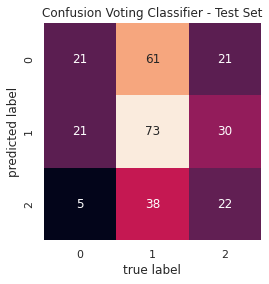

In [148]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = ereg.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Voting Classifier - Test Set')
plt.show()

## 2.1.6. XGBoost

In [82]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=10)
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=10, cv=3, n_jobs=8, return_train_score=True)

search.fit(X_train_1, y_train_1)

/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/bnt4me/.local/lib/python3.8/site-packages/

[13:37:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:58:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:06:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[13:37:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:44:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:59:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[14:16:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fab90cd13d0>,
                                        'max_depth':

In [83]:
search.best_params_

{'colsample_bytree': 0.9313961929800237,
 'gamma': 0.01037597467970075,
 'learning_rate': 0.2200944704778826,
 'max_depth': 5,
 'n_estimators': 128,
 'subsample': 0.7994028049210362}

In [84]:
from sklearn.metrics import classification_report

y_pred_rf = search.predict(X_test)

print('Classification report:\n{0}\n'.format(classification_report(y_test, y_pred_rf)))

Classification report:
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        47
           1       0.60      0.80      0.68       172
           2       0.28      0.14      0.18        73

    accuracy                           0.53       292
   macro avg       0.40      0.37      0.37       292
weighted avg       0.48      0.53      0.49       292




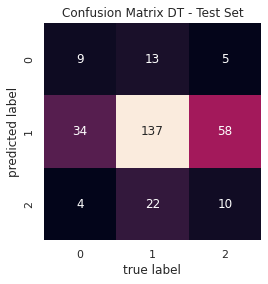

In [85]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = search.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

## 2.2.0. Undersampling

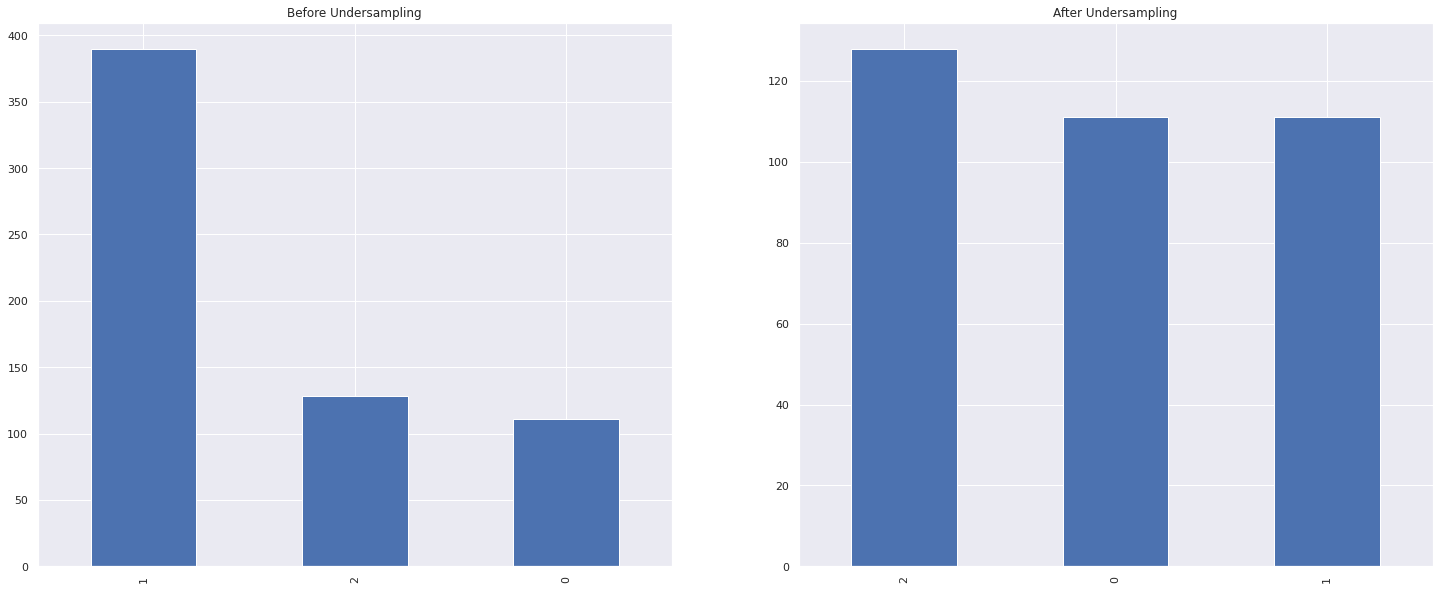

In [48]:
def apply_undersampling(X, y):
    from imblearn.under_sampling import RandomUnderSampler
    from matplotlib import pyplot as plt

    X_class = X

    fig, axs = plt.subplots(1,2, figsize=(25,10))
    pd.Series(y_train).value_counts().plot.bar(ax = axs[0]).title.set_text('Before Undersampling')

    undersample = RandomUnderSampler(sampling_strategy='majority')
    # undersample = RandomUnderSampler(sampling_strategy=0.5)
    # fit and apply the transform

    X_class, label_cat = undersample.fit_resample(X, y)

    pd.Series(label_cat).value_counts().plot.bar(ax = axs[1]).title.set_text('After Undersampling')

    return X_class, label_cat

X_train_1, y_train_1 = apply_undersampling(X_train, y_train)

In [150]:
X_train_1.shape
# X_class, label_cat

(492, 637)

# Data Clasification

## 2.2.1. NN

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer


param_grid = {'activation': ['logistic', 'relu'],'alpha':[0.0001,0.001]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

neu_net = MLPClassifier(random_state=1, max_iter=300)
clf_nn = GridSearchCV(neu_net, param_grid,cv=10,scoring=scores,
                       refit='accuracy', return_train_score=True,n_jobs=5)
clf_nn.fit(X_train_1, y_train_1)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=300, random_state=1),
             n_jobs=5,
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.0001, 0.001]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)})

In [50]:
print(clf_nn.best_params_)

{'activation': 'relu', 'alpha': 0.0001}


In [51]:
df = pd.DataFrame(clf_nn.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
2,0.443674,"{'activation': 'relu', 'alpha': 0.0001}",0.351429,0.088571,1,0.351429,0.088571,0.351429,0.088571
3,0.436398,"{'activation': 'relu', 'alpha': 0.001}",0.351429,0.088571,1,0.351429,0.088571,0.351429,0.088571
0,1.548026,"{'activation': 'logistic', 'alpha': 0.0001}",0.345714,0.056352,3,0.345714,0.056352,0.345714,0.056352
1,1.517859,"{'activation': 'logistic', 'alpha': 0.001}",0.345714,0.056352,3,0.345714,0.056352,0.345714,0.056352


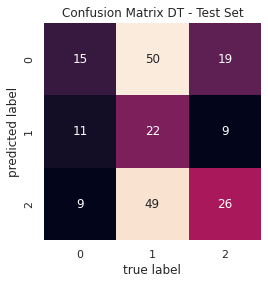

Precision: 0.300
Recall: 0.300
Accuracy: 0.300


In [52]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_test_pred = clf_nn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 2.2.2. Tree model

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer


tree_para = {'criterion':['gini','entropy'],'max_depth':[4,6,8,10,12,15,17,20]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

clf_tree = GridSearchCV(DecisionTreeClassifier(random_state=15), tree_para, cv=10,
                        scoring=scores,refit='accuracy', return_train_score=True,n_jobs=4)
clf_tree = clf_tree.fit(X_train_1, y_train_1)
print(clf_tree.best_params_)

{'criterion': 'gini', 'max_depth': 4}


In [54]:
df = pd.DataFrame(clf_tree.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,0.040984,"{'criterion': 'gini', 'max_depth': 4}",0.391429,0.072337,1,0.391429,0.072337,0.391429,0.072337
1,0.055217,"{'criterion': 'gini', 'max_depth': 6}",0.354286,0.084949,2,0.354286,0.084949,0.354286,0.084949
9,0.081238,"{'criterion': 'entropy', 'max_depth': 6}",0.351429,0.052761,3,0.351429,0.052761,0.351429,0.052761
10,0.093986,"{'criterion': 'entropy', 'max_depth': 8}",0.351429,0.067673,3,0.351429,0.067673,0.351429,0.067673
11,0.099957,"{'criterion': 'entropy', 'max_depth': 10}",0.348571,0.067370,5,0.348571,0.067370,0.348571,0.067370
12,0.100407,"{'criterion': 'entropy', 'max_depth': 12}",0.345714,0.064460,6,0.345714,0.064460,0.345714,0.064460
13,0.100576,"{'criterion': 'entropy', 'max_depth': 15}",0.342857,0.066394,7,0.342857,0.066394,0.342857,0.066394
14,0.100880,"{'criterion': 'entropy', 'max_depth': 17}",0.342857,0.066394,7,0.342857,0.066394,0.342857,0.066394
15,0.099447,"{'criterion': 'entropy', 'max_depth': 20}",0.342857,0.066394,7,0.342857,0.066394,0.342857,0.066394
5,0.070109,"{'criterion': 'gini', 'max_depth': 15}",0.340000,0.051824,10,0.340000,0.051824,0.340000,0.051824


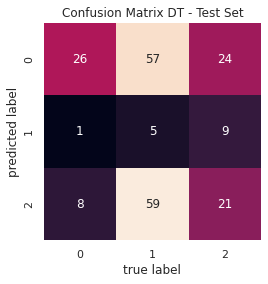

Precision: 0.248
Recall: 0.248
Accuracy: 0.248


In [55]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


y_test_pred = clf_tree.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 2.2.3. K Neighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier

nn_para = {'n_neighbors':[3,6,9],
          'metric':["euclidean","manhattan"]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

clf_kn = GridSearchCV(KNeighborsClassifier(), nn_para, cv=10, scoring=scores,
                       refit='accuracy', return_train_score=True,n_jobs=4)
clf_kn = clf_kn.fit(X_train_1, y_train_1)
print(clf_kn.best_params_)

{'metric': 'euclidean', 'n_neighbors': 6}


In [57]:
df = pd.DataFrame(clf_kn.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
1,0.004935,"{'metric': 'euclidean', 'n_neighbors': 6}",0.368571,0.073900,1,0.368571,0.073900,0.368571,0.073900
2,0.004633,"{'metric': 'euclidean', 'n_neighbors': 9}",0.360000,0.086850,2,0.360000,0.086850,0.360000,0.086850
3,0.003878,"{'metric': 'manhattan', 'n_neighbors': 3}",0.357143,0.038861,3,0.357143,0.038861,0.357143,0.038861
0,0.008039,"{'metric': 'euclidean', 'n_neighbors': 3}",0.348571,0.081616,4,0.348571,0.081616,0.348571,0.081616
5,0.002664,"{'metric': 'manhattan', 'n_neighbors': 9}",0.342857,0.044263,5,0.342857,0.044263,0.342857,0.044263
4,0.002868,"{'metric': 'manhattan', 'n_neighbors': 6}",0.325714,0.048149,6,0.325714,0.048149,0.325714,0.048149


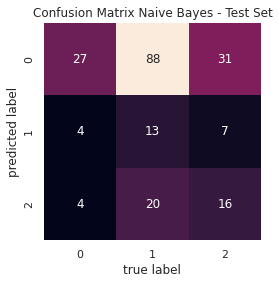

Precision: 0.248
Recall: 0.248
Accuracy: 0.248


In [58]:
y_test_pred_gnb = clf_kn.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred_gnb)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred_gnb))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix Naive Bayes - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

## 2.2.4. Support Vector Machine

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

param_grid =  {'penalty':['l2'],'C':[1,2,3,5,10,15,20,30,40,60,90, 320]}
scores= {'accuracy':make_scorer(accuracy_score),'precision':make_scorer(precision_score,average='micro'),
         'recall':make_scorer(recall_score,average='micro')}

svc = svm.LinearSVC(random_state=10)
clf_svc = GridSearchCV(svc, param_grid,cv=10,scoring=scores,
                        refit='accuracy', return_train_score=True, n_jobs=5)
clf_svc.fit(X_train_1, y_train_1) 

GridSearchCV(cv=10, estimator=LinearSVC(random_state=10), n_jobs=5,
             param_grid={'C': [1, 2, 3, 5, 10, 15, 20, 30, 40, 60, 90, 320],
                         'penalty': ['l2']},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)})

In [162]:
print(clf_svc.best_params_)

{'C': 1, 'penalty': 'l2'}


In [60]:
df = pd.DataFrame(clf_svc.cv_results_)
df.sort_values(by='rank_test_accuracy')[['mean_fit_time','params','mean_test_accuracy','std_test_accuracy','rank_test_accuracy',
                                         'mean_test_precision','std_test_precision','mean_test_recall','std_test_recall']]

,mean_fit_time,params,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall
0,0.259349,"{'C': 1, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991
1,0.270391,"{'C': 2, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991
2,0.287302,"{'C': 3, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991
3,0.293657,"{'C': 5, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991
4,0.302113,"{'C': 10, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991
5,0.295968,"{'C': 15, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991
6,0.298019,"{'C': 20, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991
7,0.292800,"{'C': 30, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991
8,0.305159,"{'C': 40, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991
9,0.296831,"{'C': 60, 'penalty': 'l2'}",0.308571,0.041991,1,0.308571,0.041991,0.308571,0.041991


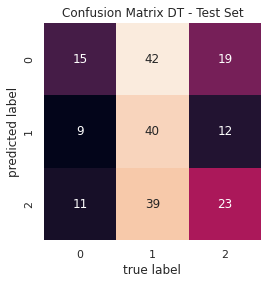

Precision: 0.371
Recall: 0.371
Accuracy: 0.371


In [61]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = clf_svc.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()

print('Precision: %.3f' %(precision_score(y_test, y_test_pred,average='micro')))
print('Recall: %.3f' %(recall_score(y_test, y_test_pred,average='micro')))
print('Accuracy: %.3f' %(accuracy_score(y_test,y_test_pred)))

# Ensemble method:


## 2.2.5. Voting clasifier

In [62]:
from sklearn.ensemble import VotingClassifier

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


classif_model_1 = DecisionTreeClassifier(random_state=15, criterion= 'gini', max_depth= 10)

classif_model_2 = MLPClassifier(random_state=1, max_iter=300, activation= 'relu', alpha= 0.0001)

classif_model_3 = svm.LinearSVC(random_state=1, C= 1, penalty= 'l2')

classif_model_4 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 3, 
                                       weights= 'distance',n_jobs=4)

ereg = VotingClassifier(estimators=[('DT', classif_model_1), ('NN', classif_model_2),
                                    ('SVC', classif_model_3), ('KNN', classif_model_4)])
ereg = ereg.fit(X_train_1, y_train_1)

In [63]:
from sklearn.metrics import classification_report

y_pred_rf = ereg .predict(X_test)

print('Classification report:\n{0}\n'.format(classification_report(y_test, y_pred_rf)))

Classification report:
              precision    recall  f1-score   support

           0       0.20      0.71      0.32        35
           1       0.55      0.13      0.21       121
           2       0.37      0.41      0.39        54

    accuracy                           0.30       210
   macro avg       0.38      0.42      0.31       210
weighted avg       0.45      0.30      0.28       210




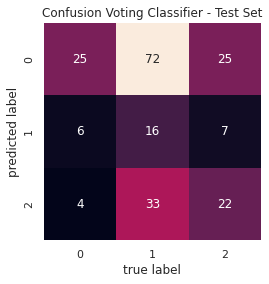

In [64]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = ereg.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Voting Classifier - Test Set')
plt.show()

## 2.2.6. XGBoost

In [168]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=10)
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=10, cv=3, n_jobs=8, return_train_score=True)

search.fit(X_train_1, y_train_1)

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fab90c58220>,
                                        'max_depth':

In [169]:
search.best_params_

{'colsample_bytree': 0.7035364088154892,
 'gamma': 0.30597167055550545,
 'learning_rate': 0.12956467670031507,
 'max_depth': 3,
 'n_estimators': 115,
 'subsample': 0.734199858607948}

In [170]:
from sklearn.metrics import classification_report

y_pred_rf = search.predict(X_test)

print('Classification report:\n{0}\n'.format(classification_report(y_test, y_pred_rf)))

Classification report:
              precision    recall  f1-score   support

           0       0.24      0.28      0.26        47
           1       0.56      0.19      0.29       172
           2       0.26      0.63      0.37        73

    accuracy                           0.32       292
   macro avg       0.35      0.37      0.30       292
weighted avg       0.43      0.32      0.30       292




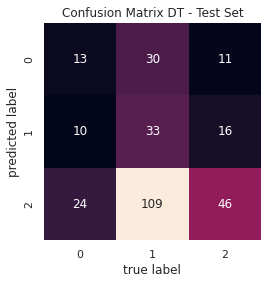

[16:17:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[16:17:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:23:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:34:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[16:17:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:23:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:35:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:42:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[16:17:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[16:17:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[16:17:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:45:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

[16:17:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/bnt4me/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarni

In [171]:
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test_pred = search.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_test.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels= np.unique(y_test),
            yticklabels= np.unique(y_test_pred))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix DT - Test Set')
plt.show()